In [1]:
#Multiple independent variables
#Multi-linear regression
#y=a0+a1*x1+a2*x2+a3*x3.....an*xn
#Goal is best fit plane, hyper-plane
#If two independent variables->plane
#If more than two independent variables->hyper plane
#Assumptions of multi linear regression:
#Linear relationship between dependent variables and independent variables
#independent variables are not too highly correlated with each other
#Correlation->0(less correlation)
#Correlation->+-1(high correlation)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dataset=pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [23]:
dataset.isnull().any().any()

False

In [24]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

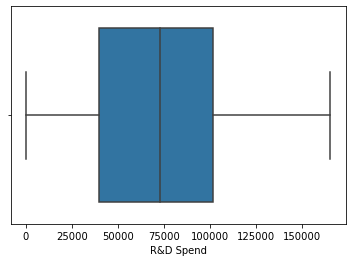

In [25]:
sns.boxplot(dataset['R&D Spend'])

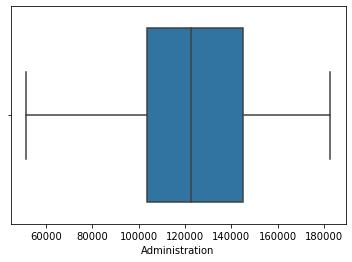

In [26]:
sns.boxplot(dataset['Administration'])

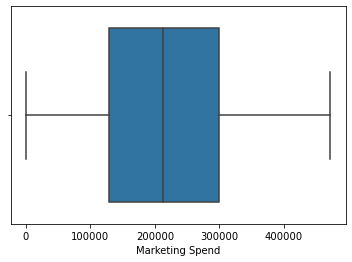

In [27]:
sns.boxplot(dataset['Marketing Spend'])

In [28]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

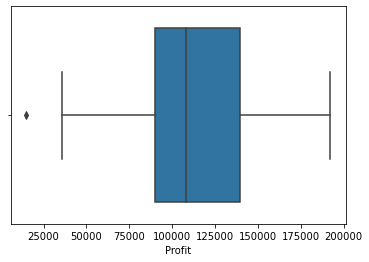

In [10]:
sns.boxplot(dataset['Profit'])

In [11]:
# if unknown is a category, it is not null value

In [40]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
dataset.drop(49,axis=0,inplace=True)

In [29]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


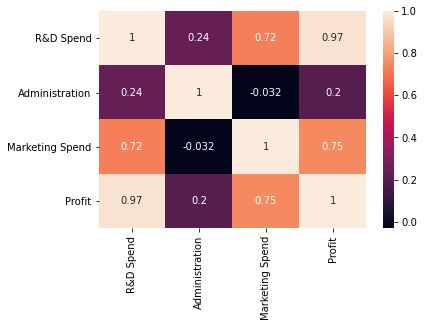

In [30]:
sns.heatmap(dataset.corr(),annot=True)

In [31]:
x=dataset.iloc[:,0:4].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [17]:
x_train

NameError: name 'x_train' is not defined

In [57]:
y=dataset.iloc[:,4].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [38]:
import sklearn 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [34]:
ct = ColumnTransformer([("on",OneHotEncoder(),[3])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [43]:
x=x[:,1:]
x

array([[1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 153441.51, 101145.55, 407934.54],
       [1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 142107.34, 91391.77, 366168.42],
       [1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 130298.13, 145530.06, 323876.68],
       [1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 119943.24, 156547.42, 256512.92],
       [1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 78013.11, 121597.55, 264346.06],
       [1.0, 94657.16, 145077.58, 282574.31],
       [0.0, 91749.16, 114175.79, 294919.57],
       [1.0, 86419.7, 153514.11, 0.0],
       [0.0, 76253.86, 113867.3, 298664.47],
       [1.0, 78389.47, 153773.43, 29

In [39]:
x.shape

(50, 5)

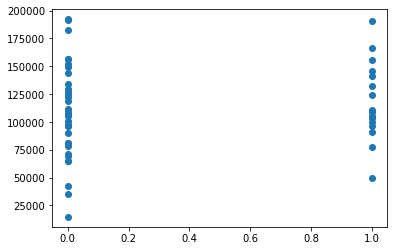

In [37]:
plt.scatter(x[:,0],y) # not linearly related

In [ ]:
plt.scatter(x[:,2],y) #linearly related

In [ ]:
plt.scatter(x[:,3],y) #not linearly related

In [ ]:
plt.scatter(x[:,4],y) # linearly related

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #independent, dependent, test size and random state

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rcsv=RandomForestRegressor()

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#randomized search cv paramters
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [63]:
#Avoids overfitting
max_depth=[int(x) for x in np.linspace(5,30,6)]
max_depth

[5, 10, 15, 20, 25, 30]

In [64]:
#Avoids underfitting
min_samples_leaf=[1,2,5,10]
min_samples_leaf

[1, 2, 5, 10]

In [52]:
#create the random grid
random_grid={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_leaf': [1, 2, 5, 10]}

In [65]:
rf_random= RandomizedSearchCV(estimator=rcsv,param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5,random_state=0)


In [66]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error')

In [67]:
rf_random.best_params_

{'n_estimators': 800, 'min_samples_leaf': 1, 'max_depth': 10}

In [68]:
y_pred=rf_random.predict(x_test)
y_pred

array([103272.392675 , 135926.0530375, 135703.8193125,  80067.4218375,
       182444.3285125, 114384.7439875,  69790.291375 ,  99554.9104   ,
       112248.71225  , 168274.6778   ])

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9618265142676564